# Suitability Criteria

> **NOTE:** If you are not familiar with the different suitability functions and how to use them, we recommand you start with the Suitability Functions [tutorial](functions.ipynb), which provides an overview of the available functions and their usage.

`SuitabilityCriteria` is used to defined a criteria, set its associated indicator, and described how its suitability is computed. It has the following attributes:
- name: criteria name
- indicator: input data to compute suitability
- func (`SuitabilityFunction`): suitability function to use
- weight (default=1): criteria weight used when computing land suitability
- category (optional): criteria category allowing to compute land suitability for different category (e.g., climate, soil...)
- long_name: criteria long name
- description: description of the criteria
- comment: additional information
- is_computed (bool, default=False): specify if the indicator data already corresponds to it's suitability.

Here is a simple example with sample data included in the package:

In [5]:
from lsapy import SuitabilityCriteria, SuitabilityFunction
from lsapy.utils import load_soil_data

soil_data = load_soil_data()

sc = SuitabilityCriteria(
    name="potential_root_depth",
    long_name="Potential Rooting Depth Suitability",
    indicator=soil_data["PRD"],  # indicator as xr.DataArray
    func=SuitabilityFunction(name="vetharaniam2022_eq5", params={"a": -11.98, "b": 0.459}),
)

We can now compute the suitability of the criteria and plot the result.

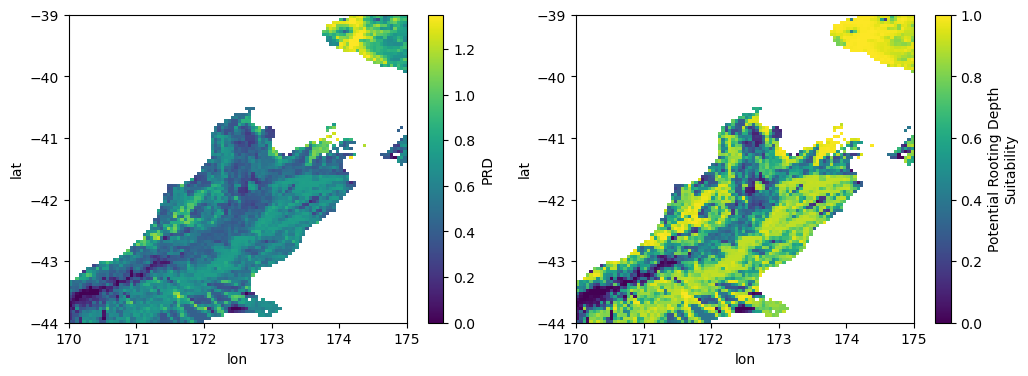

In [6]:
import matplotlib.pyplot as plt

prd = sc.compute()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
soil_data["PRD"].plot(ax=ax[0])
prd.plot(ax=ax[1], vmin=0, vmax=1)
plt.show()

Let's see another example with climate data. We use `xclim` package to calculate the total annual precipition and use this latter as criteria indicator.

In [7]:
from xclim.indicators.atmos import precip_accumulation

from lsapy.utils import load_climate_data

clim_data = load_climate_data()

pr_tot = precip_accumulation(clim_data["pr"], freq="YS")  # YS: Year Start frequency

sc = SuitabilityCriteria(
    name="water_requirements",
    long_name="Annual Rainfall Requirement Suitability",
    indicator=pr_tot,
    func=SuitabilityFunction(name="vetharaniam2022_eq5", params={"a": 0.876, "b": 1248}),
)

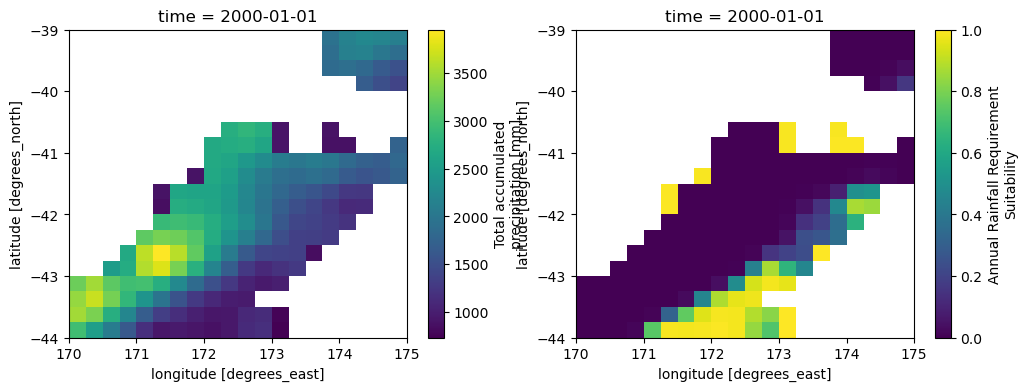

In [8]:
water_req = sc.compute()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pr_tot.isel(time=0).plot(ax=ax[0])  # use first year of data as example
water_req.isel(time=0).plot(ax=ax[1], vmin=0, vmax=1)
plt.show()